In [1]:
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import wfdb 

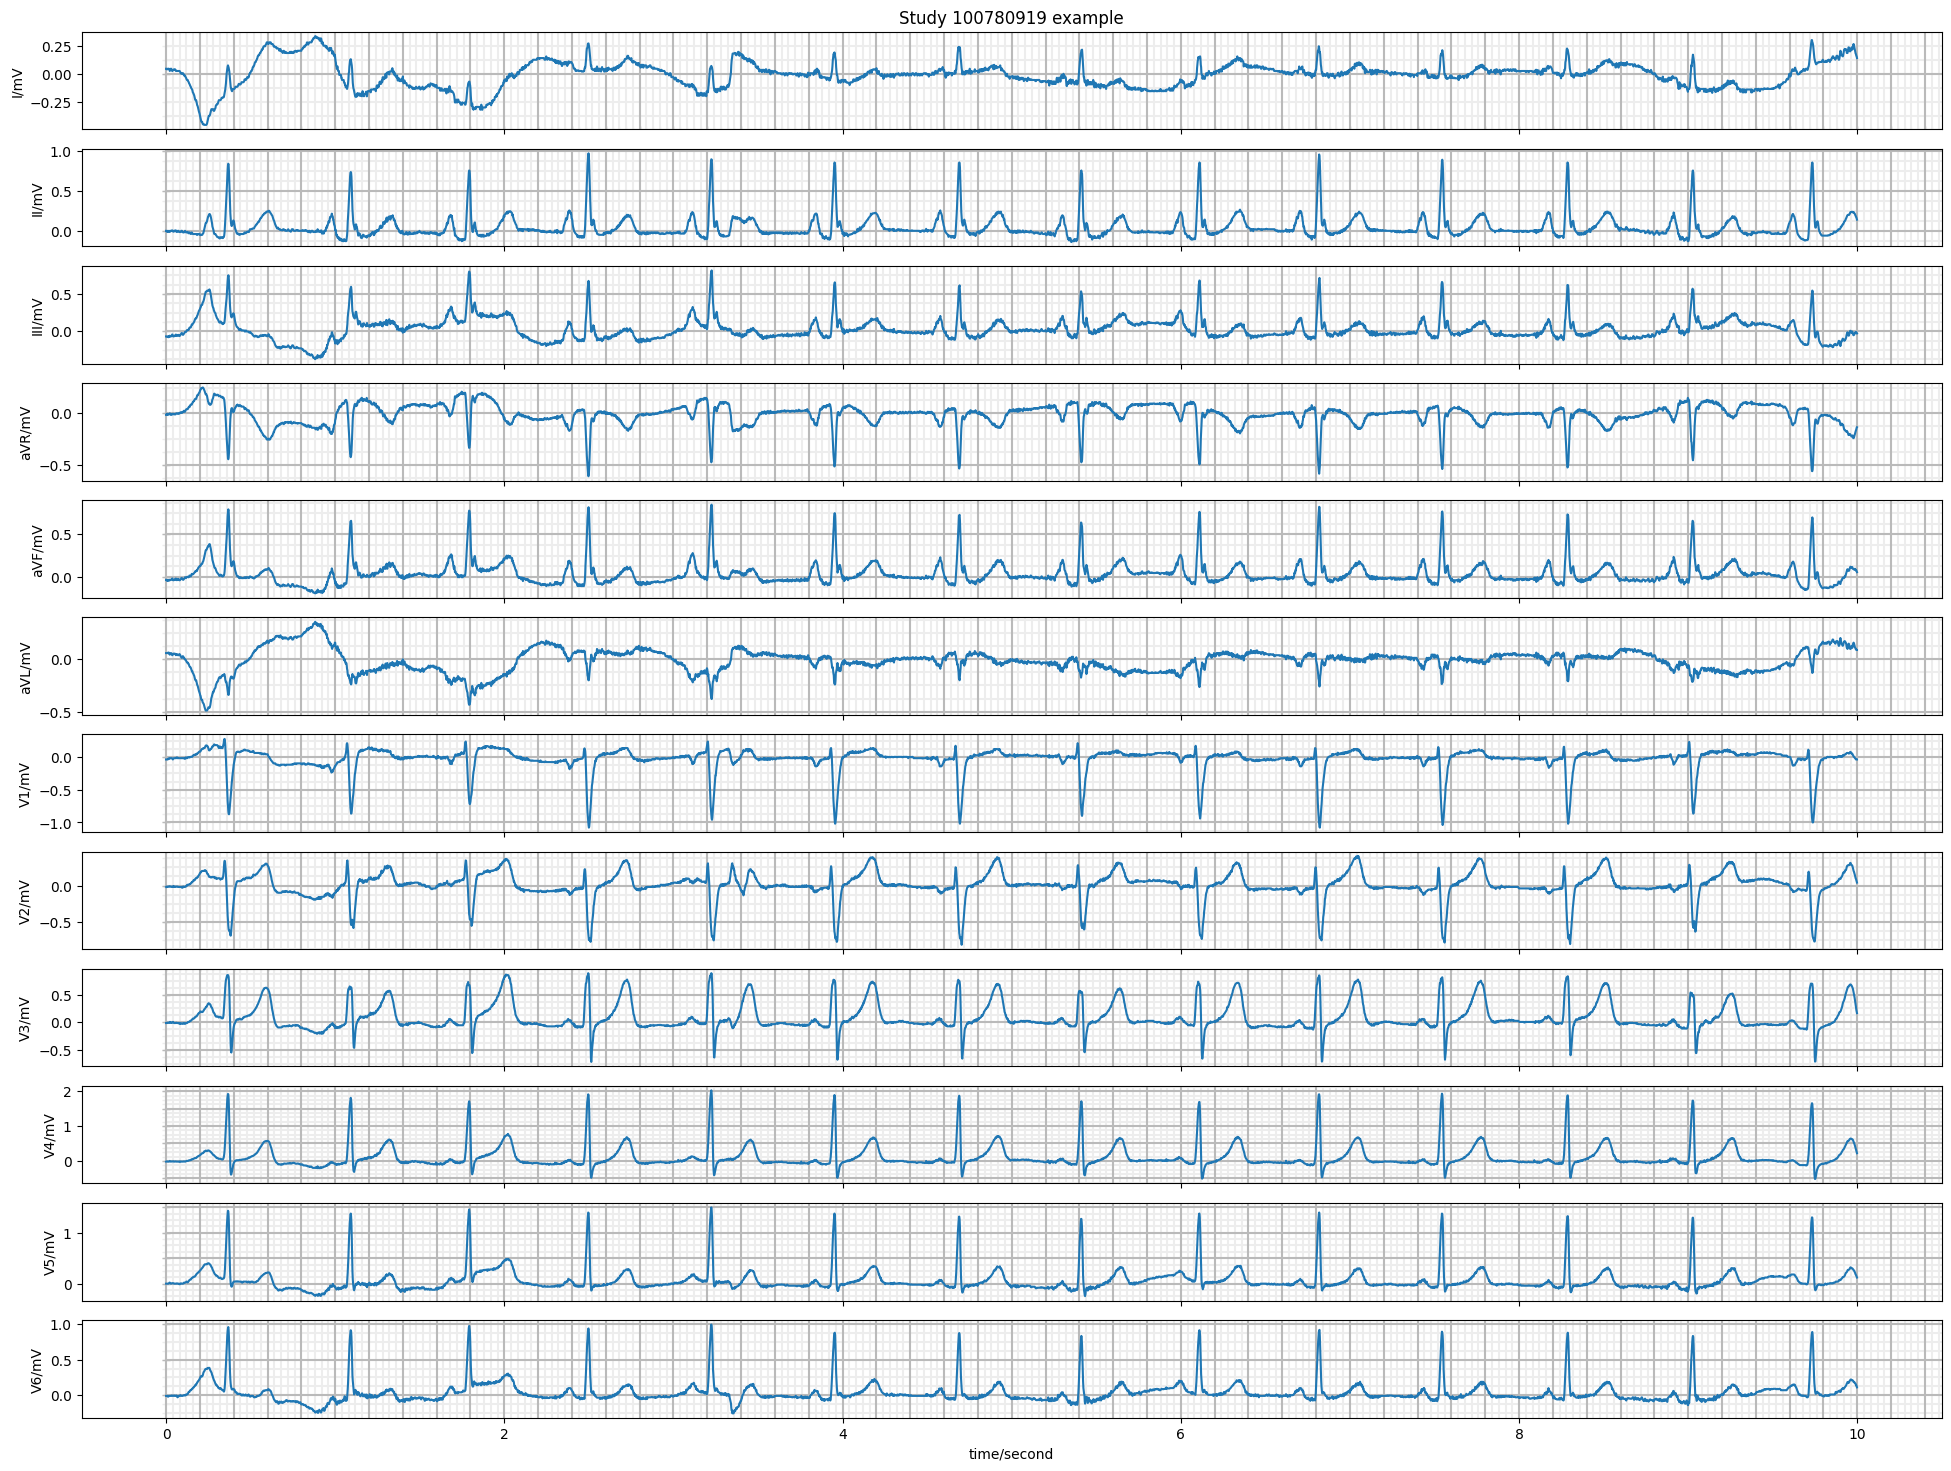

In [3]:
rec_path = 'mimic-iv-ecg-demo-diagnostic-electrocardiogram-matched-subset-demo-0.1/files/p10000032/s100780919/100780919'
rd_record = wfdb.rdrecord(rec_path) 
wfdb.plot_wfdb(record=rd_record, figsize=(24,18), title='Study 100780919 example', ecg_grids='all')

In [4]:
#Loading Metadata for ECGs
from pathlib import Path
import wfdb
import pandas as pd
import numpy as np

# Path to your demo dataset folder (adjust this path)
base_path = Path("mimic-iv-ecg-demo-diagnostic-electrocardiogram-matched-subset-demo-0.1/files")

records = []
for hea_path in base_path.rglob("*.hea"):
    try:
        header = wfdb.rdheader(str(hea_path).replace('.hea', ''))
        records.append({
            "subject_id": hea_path.parts[-3],
            "study_id": hea_path.stem,
            "base_date": header.base_date,
            "base_time": header.base_time,
            "fs": header.fs,
            "sig_len": header.sig_len,
            "n_sig": header.n_sig,
            "sig_names": ",".join(header.sig_name)
        })
    except Exception as e:
        print(f"Error reading {hea_path}: {e}")

df_meta = pd.DataFrame(records)
df_meta["datetime"] = pd.to_datetime(df_meta["base_date"].astype(str) + " " + df_meta["base_time"].astype(str), errors="coerce")

df_meta
print("\nTotal ECGs:", len(df_meta))



Total ECGs: 659


In [5]:
df_meta

,subject_id,study_id,base_date,base_time,fs,sig_len,n_sig,sig_names,datetime
0,p10005866,107819285,2149-10-03,11:18:06,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2149-10-03 11:18:06
1,p10005866,105060792,2149-10-03,13:08:58,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2149-10-03 13:08:58
2,p10005866,106632231,2149-09-19,03:20:06,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2149-09-19 03:20:06
3,p10005866,104228353,2149-10-01,02:52:55,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2149-10-01 02:52:55
4,p10005866,109138694,2149-10-03,11:16:54,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2149-10-03 11:16:54
...,...,...,...,...,...,...,...,...,...
654,p10038999,107395787,2131-05-25,20:51:24,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2131-05-25 20:51:24
655,p10038999,105862861,2131-05-22,22:41:16,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2131-05-22 22:41:16
656,p10038999,109127970,2131-05-26,14:39:48,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2131-05-26 14:39:48
657,p10009049,101588208,2174-05-30,05:59:10,500,5000,12,"I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6",2174-05-30 05:59:10


In [6]:
df_meta['subject_id'].nunique()

92

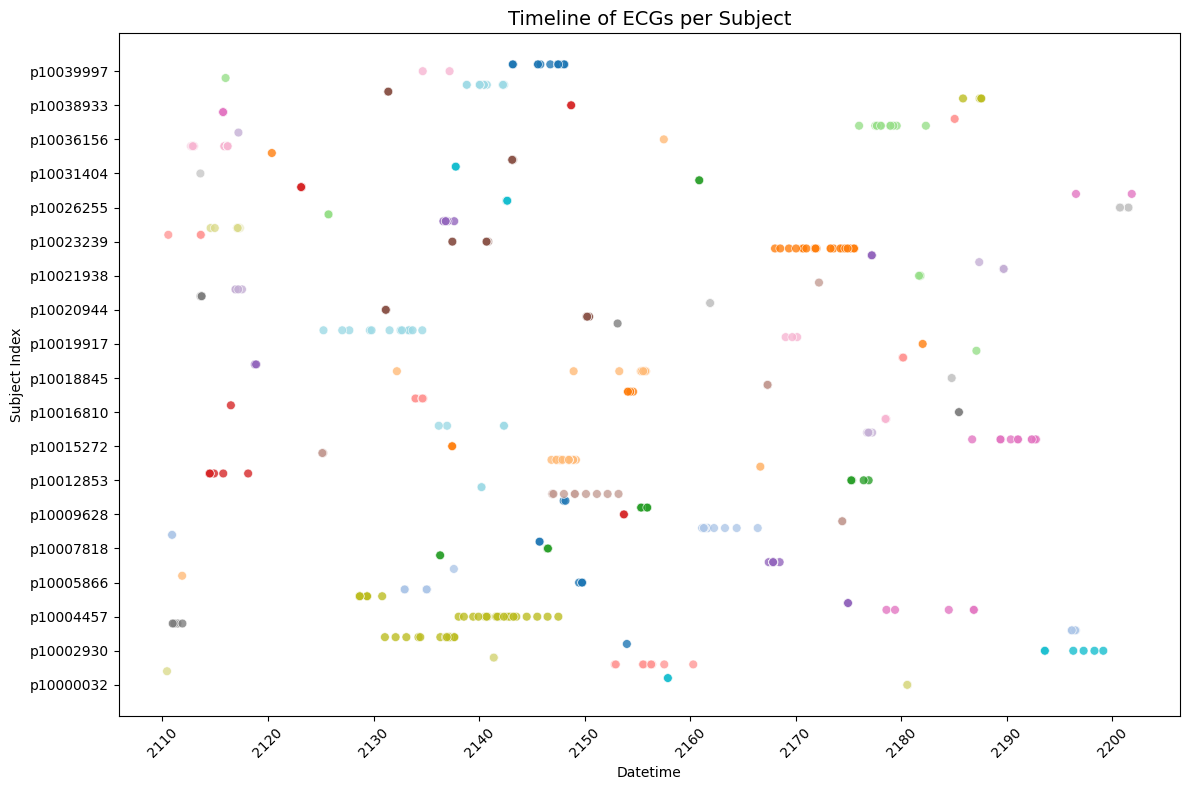

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
#Not sure if this is valid because they de-intified timestamps?

# Create numeric mapping
subject_map = {sid: i for i, sid in enumerate(sorted(df_meta["subject_id"].unique()))}
df_meta["subject_index"] = df_meta["subject_id"].map(subject_map)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_meta,
    x="datetime",
    y="subject_index",
    hue="subject_id",
    palette="tab20",
    s=40,
    alpha=0.8,
    legend=False
)
plt.title("Timeline of ECGs per Subject", fontsize=14)
plt.xlabel("Datetime")
plt.ylabel("Subject Index")

# Optionally show fewer y-ticks
plt.yticks(list(subject_map.values())[::5], list(subject_map.keys())[::5])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [8]:
rec_path = "mimic-iv-ecg-demo-diagnostic-electrocardiogram-matched-subset-demo-0.1/files/p10000032/s100780919/100780919"
record = wfdb.rdrecord(rec_path)

df_signal = pd.DataFrame(record.p_signal, columns=record.sig_name)
df_signal.describe()

#Understanding the diff parameters
#Limb Leads, Frontal Plane: I, II, III, aVR, aVL, aVF
#Rest are front-to-back electrical activity across the chest: Chest Plane


,I,II,III,aVR,aVF,aVL,V1,V2,V3,V4,V5,V6
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.007469,0.045368,0.027884,-0.011534,0.036466,-0.014925,-0.026946,0.007140,0.089274,0.107642,0.066700,0.038770
std,0.115196,0.142243,0.145949,0.106057,0.132023,0.110820,0.174329,0.178021,0.249337,0.323982,0.221601,0.151226
min,-0.455000,-0.140000,-0.375000,-0.610000,-0.195000,-0.490000,-1.080000,-0.815000,-0.720000,-0.520000,-0.245000,-0.255000
25%,-0.075000,-0.030000,-0.060000,-0.055000,-0.035000,-0.085000,-0.035000,-0.040000,-0.050000,-0.045000,-0.040000,-0.030000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.050000,0.085000,0.095000,0.050000,0.075000,0.045000,0.050000,0.080000,0.135000,0.120000,0.105000,0.070000
max,0.335000,0.970000,0.815000,0.250000,0.850000,0.360000,0.280000,0.405000,0.890000,2.025000,1.495000,0.995000
